In [90]:
import pandas as pd
import numpy as np

In [91]:
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [92]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [93]:
df.dropna(inplace = True)

In [94]:
df.shape


(714, 3)

In [95]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [96]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [97]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [98]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [99]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
y_pred = clf.predict(x_test)

In [101]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [102]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring = 'accuracy'))

0.6317097026604068

In [103]:
kbin_age = KBinsDiscretizer(n_bins = 15,encode = 'ordinal',strategy = 'kmeans')

In [104]:
kbin_fare = KBinsDiscretizer(n_bins = 15, encode = 'ordinal',strategy = 'kmeans')

In [105]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [106]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [107]:
trf.named_transformers_['first'].n_bins_

array([15])

In [108]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      ,  5.27754049, 11.74158654, 17.35243056, 21.55720029,
              26.64837093, 32.14464286, 37.41916667, 42.9025    , 48.1075    ,
              53.110625  , 58.090625  , 62.3875    , 67.72916667, 75.54166667,
              80.        ])                                                   ],
      dtype=object)

In [109]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,  11.66460214,  21.29623286,  32.49767746,
               45.10813671,  60.25665754,  73.58500975,  84.501941  ,
              101.00790682, 123.56362348, 144.756475  , 185.67419167,
              232.14060833, 255.15623333, 387.56043333, 512.3292    ])],
      dtype=object)

In [110]:
clf = DecisionTreeClassifier()

In [111]:
clf.fit(x_train_trf,y_train)

DecisionTreeClassifier()

In [112]:
y_pred2 = clf.predict(x_test_trf)

In [113]:
accuracy_score(y_test,y_pred2)

0.6293706293706294

In [114]:
x_trf = trf.fit_transform(x)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [115]:
np.mean(cross_val_score(clf,x,y,cv= 10, scoring = 'accuracy'))

0.6358959311424099

In [128]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode = 'ordinal', strategy = strategy)
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring = 'accuracy')))
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")
    plt.subplot(122)
    plt.hist(x_trf[:,0],color ='red')
    plt.title("After")
    plt.show

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6344874804381846


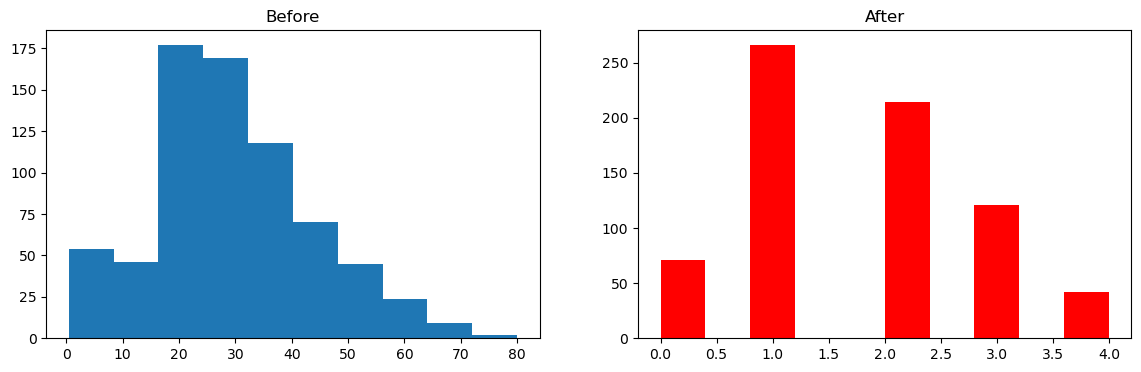

In [129]:
discretize(5,'kmeans')